## Reference：https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook

In [3]:
p='../Regularized_Linear_Models/input'
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline
color=sns.color_palette()
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn
from scipy.stats import norm,probplot,skew

from subprocess import check_output

#print(check_output(["ls","-l",p]).decode("utf-8"))

In [4]:
train_df=pd.read_csv(os.path.join(p,"train.csv"))
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df=pd.read_csv(os.path.join(p,"test.csv"))
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df_ID=train_df.Id
test_df_ID=test_df.Id

train_df.drop("Id",axis=1,inplace=True)
test_df.drop("Id",axis=1,inplace=True)

In [7]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


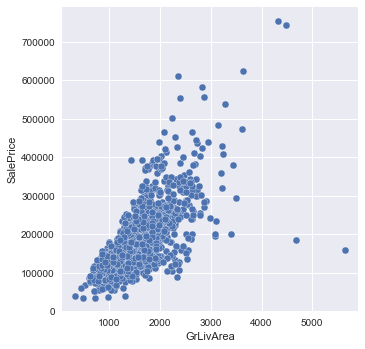

In [8]:
#ax=plt.subplot(111)
sns.pairplot(train_df,x_vars='GrLivArea',y_vars="SalePrice",size=5,palette=color[4])

In [9]:
train_df=train_df.drop(train_df[(train_df.GrLivArea>4000) & (train_df.SalePrice<300000)].index)

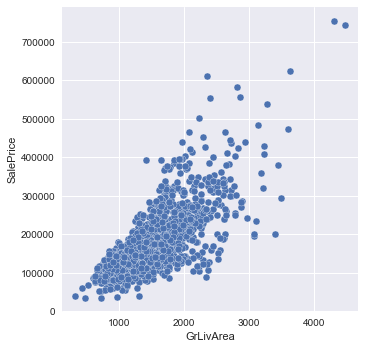

In [10]:
sns.pairplot(train_df,x_vars='GrLivArea',y_vars="SalePrice",size=5,palette=color[4])

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.259599766243, 180932.91906721535, 0.93201544928923674))

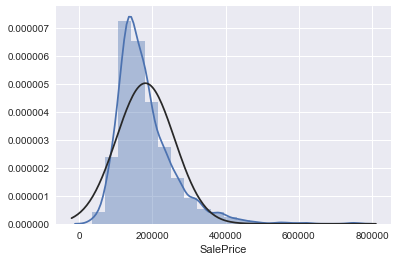

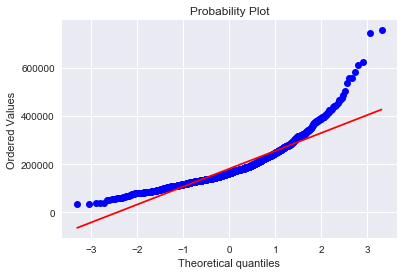

In [11]:
sns.distplot(train_df.SalePrice,bins=20,kde=True,fit=norm)
fig=plt.figure()
probplot(train_df.SalePrice,plot=plt)

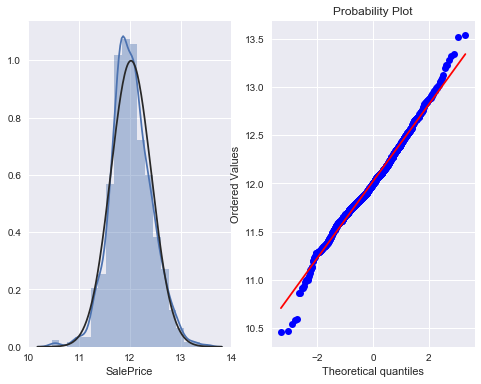

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,6))

sns.distplot(np.log1p(train_df.SalePrice),bins=20,kde=True,fit=norm,ax=ax1)
fig=plt.figure()
probplot(np.log1p(train_df.SalePrice),plot=ax2)
train_df["SalePrice"]=np.log1p(train_df.SalePrice)

In [13]:
print(train_df.shape)
print(test_df.shape)
ntrain=train_df.shape[0]
ntest=test_df.shape[0]
y_train=train_df.SalePrice
contact_df=pd.concat((train_df,test_df))#.reset_index(drop=True)
contact_df.drop("SalePrice",axis=1,inplace=True)
contact_df.head()

(1458, 80)
(1459, 79)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [14]:
all_data_na=100*contact_df.isnull().sum()/contact_df.shape[0]

all_data_na=all_data_na[all_data_na!=0].sort_values(ascending=False)[:30]
miss_df=pd.DataFrame({"missRato":all_data_na})
miss_df.head(10)

,missRato
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

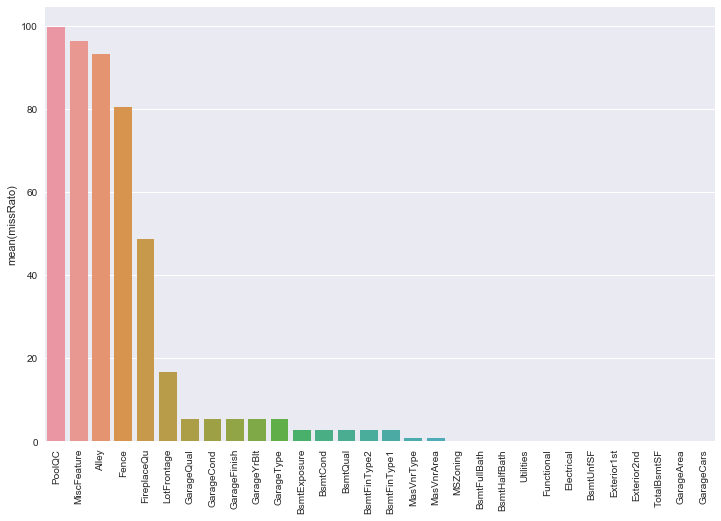

In [15]:
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(x=miss_df.index,y=miss_df.missRato,data=miss_df,ax=ax)
plt.xticks(rotation=90)

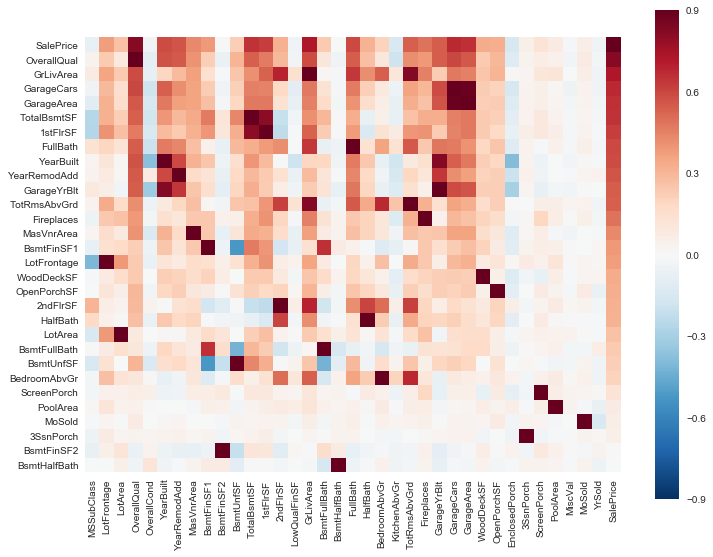

In [16]:
corr=train_df.corr()
corr_top=corr.sort_values(by="SalePrice",ascending=False)[:30]
plt.subplots(figsize=(12,9))
sns.heatmap(corr_top,vmax=0.9,square=True)

In [105]:
corr_top

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.073969,0.372900,0.260544,0.821405,-0.036821,0.587043,0.565992,0.434621,0.392283,0.004863,...,0.334251,0.325215,-0.149029,0.054914,0.121245,0.074338,-0.020012,0.057064,-0.037151,1.000000
OverallQual,0.032522,0.235266,0.091392,1.000000,-0.090442,0.571368,0.549827,0.403421,0.222467,-0.058324,...,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.821405
GrLivArea,0.076778,0.355459,0.232927,0.589414,-0.077423,0.194397,0.286758,0.371256,0.142196,-0.007138,...,0.247120,0.302569,0.012976,0.022520,0.107768,0.115999,-0.001637,0.057296,-0.035971,0.725211
GarageCars,-0.040248,0.293489,0.152484,0.600741,-0.185275,0.537301,0.419882,0.363091,0.229077,-0.037914,...,0.225462,0.209968,-0.151110,0.035957,0.050909,0.019446,-0.043004,0.039520,-0.038494,0.681033
GarageArea,-0.099790,0.322919,0.163680,0.557230,-0.150503,0.477998,0.370000,0.362983,0.273244,-0.017108,...,0.222482,0.228246,-0.121194,0.035880,0.053015,0.026642,-0.027236,0.032470,-0.027209,0.656129
TotalBsmtSF,-0.253194,0.322824,0.223914,0.538595,-0.174931,0.400266,0.294941,0.343687,0.467624,0.114290,...,0.234476,0.215140,-0.096773,0.040921,0.092574,0.036089,-0.018514,0.025775,-0.014880,0.647563
1stFlrSF,-0.262529,0.406946,0.269234,0.469092,-0.144717,0.281253,0.238769,0.322969,0.395113,0.103923,...,0.235439,0.178859,-0.064247,0.059521,0.095042,0.062756,-0.021045,0.040558,-0.012810,0.620500
FullBath,0.131773,0.196322,0.119679,0.548420,-0.193473,0.467146,0.437927,0.271494,0.047811,-0.075969,...,0.186147,0.252678,-0.114558,0.035715,-0.007496,0.045656,-0.014122,0.054756,-0.018697,0.595899
YearBuilt,0.027757,0.116552,0.007462,0.571368,-0.375572,1.000000,0.592105,0.312832,0.249818,-0.048683,...,0.223700,0.184116,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,0.587043
YearRemodAdd,0.040503,0.081427,0.007500,0.549827,0.074615,0.592105,1.000000,0.175677,0.123039,-0.067377,...,0.204591,0.222790,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.565992


In [17]:
contact_df["PoolQC"]=contact_df.PoolQC.fillna("None")
contact_df["MiscFeature"] = contact_df["MiscFeature"].fillna("None")
contact_df["Alley"] = contact_df["Alley"].fillna("None")
contact_df["Fence"] = contact_df["Fence"].fillna("None")
contact_df["FireplaceQu"] = contact_df["FireplaceQu"].fillna("None")
contact_df["LotFrontage"]=contact_df[["Neighborhood","LotFrontage"]].groupby("Neighborhood")\
.transform(lambda x:x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    contact_df[col] = contact_df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    contact_df[col] = contact_df[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    contact_df[col] = contact_df[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    contact_df[col] = contact_df[col].fillna('None')

contact_df["MasVnrType"] = contact_df["MasVnrType"].fillna("None")
contact_df["MasVnrArea"] = contact_df["MasVnrArea"].fillna(0)


In [21]:
contact_df['MSZoning'] = contact_df['MSZoning'].fillna(contact_df['MSZoning'].mode()[0])

In [18]:
contact_df = contact_df.drop(['Utilities'], axis=1)
contact_df["Functional"] = contact_df["Functional"].fillna("Typ")
contact_df['Electrical'] = contact_df['Electrical'].fillna(contact_df['Electrical'].mode()[0])
contact_df['KitchenQual'] = contact_df['KitchenQual'].fillna(contact_df['KitchenQual'].mode()[0])
contact_df['Exterior1st'] = contact_df['Exterior1st'].fillna(contact_df['Exterior1st'].mode()[0])
contact_df['Exterior2nd'] = contact_df['Exterior2nd'].fillna(contact_df['Exterior2nd'].mode()[0])
contact_df['SaleType'] = contact_df['SaleType'].fillna(contact_df['SaleType'].mode()[0])
contact_df['MSSubClass'] = contact_df['MSSubClass'].fillna("None")

In [19]:
contact_df[contact_df.isnull().iloc[:,1].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [20]:
#MSSubClass=The building class
contact_df['MSSubClass'] = contact_df['MSSubClass'].astype(str)


#Changing OverallCond into a categorical variable
contact_df['OverallCond'] = contact_df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
contact_df['YrSold'] = contact_df['YrSold'].astype(str)
contact_df['MoSold'] = contact_df['MoSold'].astype(str)

In [21]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl=LabelEncoder()
    lbl.fit_transform(contact_df[c].values)
    contact_df[c]=lbl.fit_transform(contact_df[c].values)
    

In [22]:
contact_df['TotalSF'] = contact_df['TotalBsmtSF'] + contact_df['1stFlrSF'] + contact_df['2ndFlrSF']

In [23]:
numeric_df=contact_df.dtypes[contact_df.dtypes!="object"].index
skewed_feature=contact_df[numeric_df].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)

skewed_feature_df=pd.DataFrame({"skew":skewed_feature})
skewed_feature_df.head(10)

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [24]:
skewed_feature_df_1=skewed_feature_df[abs(skewed_feature_df)>0.75].dropna()
skewed_feature_df_1

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [25]:
from scipy.special import boxcox1p
lam=0.15
for c in skewed_feature_df_1.index:
    contact_df[c]=boxcox1p(contact_df[c],lam)

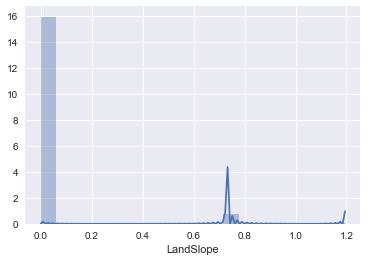

In [32]:
sns.distplot(contact_df.LandSlope,bins=20)

In [26]:
contact_df=pd.get_dummies(contact_df)

In [27]:
contact_df.shape

(2917, 220)

In [28]:
train = contact_df[:ntrain]
test = contact_df[ntrain:]

In [39]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [68]:
?RegressorMixin

In [59]:
nfolds=5
def rmse_cv(model):
    kf=KFold(n_splits=nfolds,shuffle=True,random_state=99).get_n_splits(train.values)
    rmse=np.sqrt(-cross_val_score(model,train.values,y=y_train,
                                    scoring="neg_mean_squared_error",cv=kf)) #,n_jobs=-1
    return rmse
    
    

In [31]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha =0.0005, random_state=1))

In [32]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [33]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [37]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [60]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,seed=7,nthread=-1)

In [44]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [45]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1103 (0.0072)



In [46]:
score = rmse_cv(ENet)
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1102 (0.0072)



In [47]:
score=rmse_cv(KRR)
print("\nKernelRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KernelRidge score: 0.1780 (0.0067)



In [48]:
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [61]:
score=rmse_cv(model_xgb)
print("\nXgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Xgboost score: 0.1192 (0.0053)



In [62]:
score=rmse_cv(model_lgb)
print("\nlightGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


lightGBM score: 0.1165 (0.0057)



In [76]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models=models
    # Train cloned base models
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        predictions=np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis=1)        

In [74]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1136 (0.0077)



In [75]:
?np.mean